In [30]:
import numpy as np
import pandas as pd


boston = pd.read_csv("datasets/bostonHousing/bostonHousing.csv")
#Creamos una copia para usar más adelante en la limpieza
df = boston.copy()

# Exploración de los datos
boston.info()
boston.describe().transpose()
boston.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [31]:
#Matriz de correlación
boston.corr()
#¿Qué es un matriz de correlación?
#¿Para qué sirve una matriz de correlación?
#¿Cómo puedo representarla gráficamente?

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

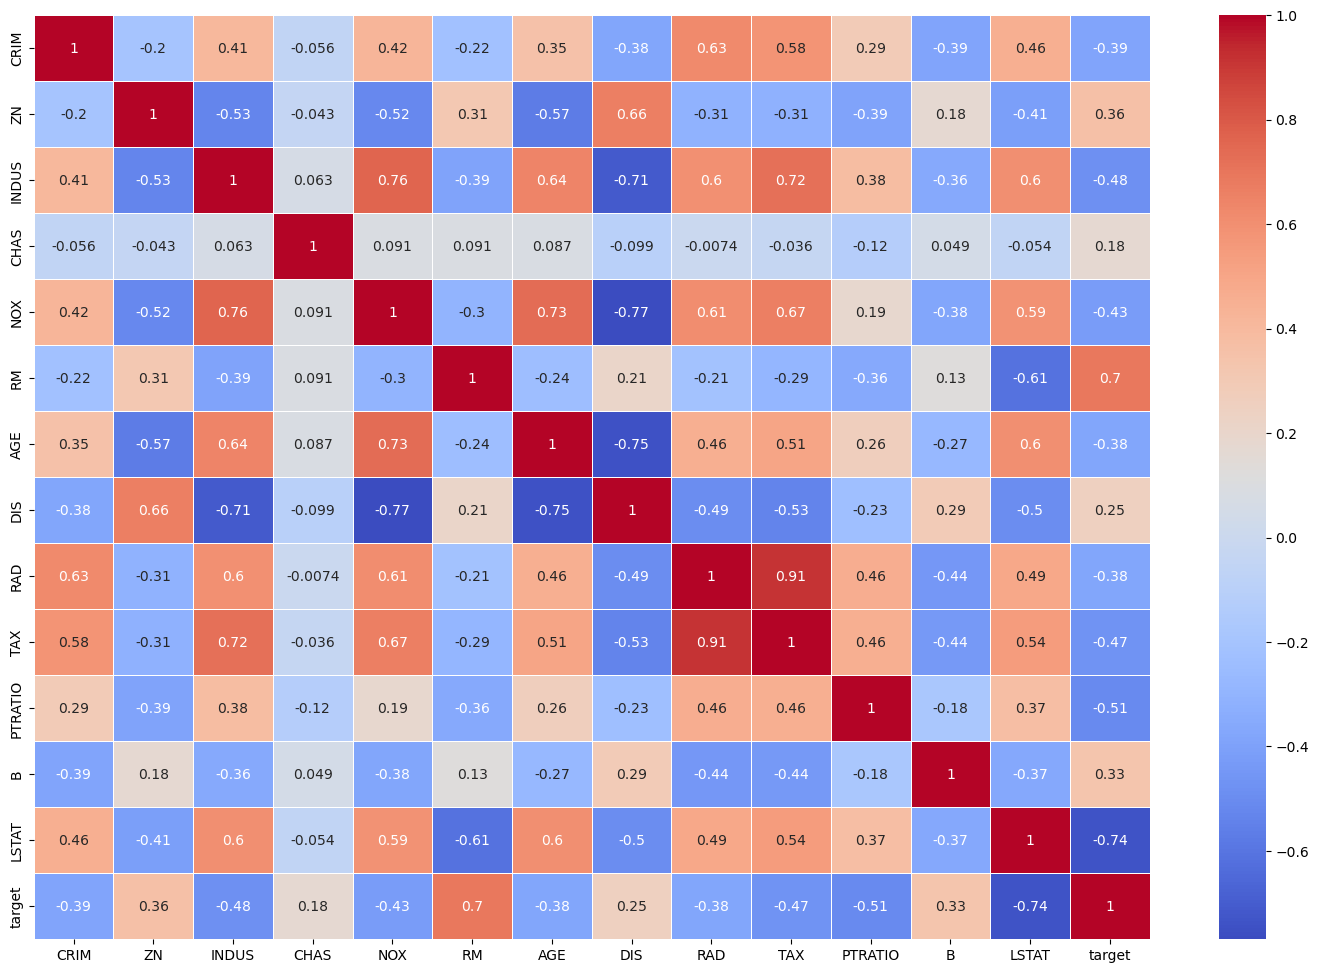

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt

cor_matriz = boston.corr()
plt.figure(figsize=(18,12))


sns.heatmap(cor_matriz, annot=True, cmap='coolwarm', linewidths=.5)

In [33]:
# Conjuntos X e Y
# y = f(x)
# x = boston.drop('target', axis=1)
x = boston.drop(columns=['target'])
y = boston['target']


# Dividimos los datos
from sklearn.model_selection import train_test_split
# 70% de datos para entrenamientomse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred, y_test)


print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("R^2: {:.2f}".format(r2))



# Entrenamiento del modelo
from sklearn.linear_model import LinearRegression
lineal = LinearRegression()
lineal.fit(x_train, y_train)


# Métricas # Bondad del ajuste
from sklearn.metrics import mean_squared_error, r2_score
y_pred = lineal.predict(x_test)


MSE: 27.42
RMSE: 5.24
R^2: 0.54


In [34]:
# Conjunto de datos de prueba
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred, y_test)


print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("R^2: {:.2f}".format(r2))


MSE: 27.42
RMSE: 5.24
R^2: 0.54


In [35]:
#Ordenamos los valores en relacion a la variable objetivo para hacer una selección
mc = boston.corr()
objetivos = cor_matriz['target'].sort_values()
print(objetivos)

#obtenemos una lista de variables seleccionadas
vbles_sel = objetivos[abs(objetivos)>= 0.35].index.to_list()
print(vbles_sel)



LSTAT     -0.737663
PTRATIO   -0.507787
INDUS     -0.483725
TAX       -0.468536
NOX       -0.427321
CRIM      -0.388305
RAD       -0.381626
AGE       -0.376955
CHAS       0.175260
DIS        0.249929
B          0.333461
ZN         0.360445
RM         0.695360
target     1.000000
Name: target, dtype: float64
['LSTAT', 'PTRATIO', 'INDUS', 'TAX', 'NOX', 'CRIM', 'RAD', 'AGE', 'ZN', 'RM', 'target']


In [36]:
x= boston[vbles_sel].drop(columns=['target'])
y= boston["target"]


In [37]:
#Entrenamiento del modelo
from sklearn.linear_model import LinearRegression


lineal = LinearRegression()
lineal.fit(x_train, y_train)

y_pred=lineal.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_pred, y_test)


print("MSE: {:.2f}".format(mse))
print("RMSE: {:.2f}".format(rmse))
print("R^2: {:.2f}".format(r2))

MSE: 27.42
RMSE: 5.24
R^2: 0.54


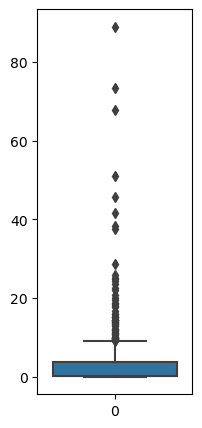

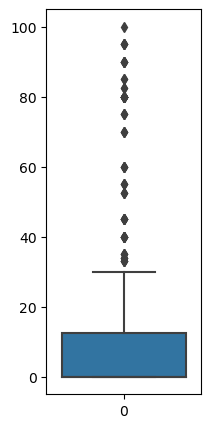

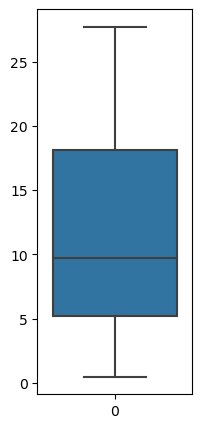

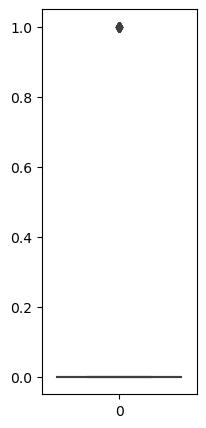

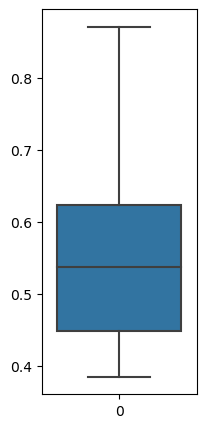

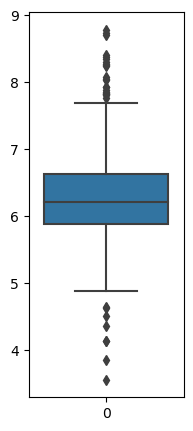

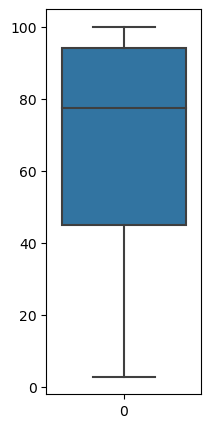

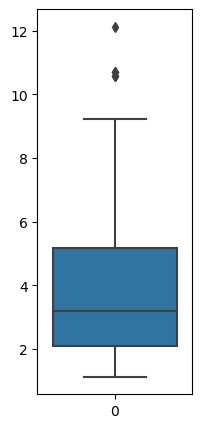

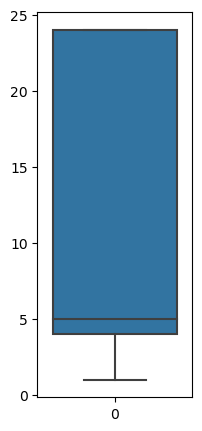

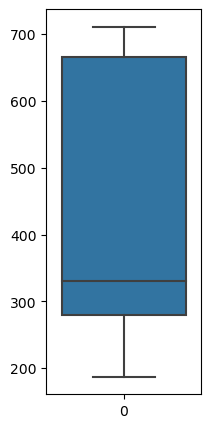

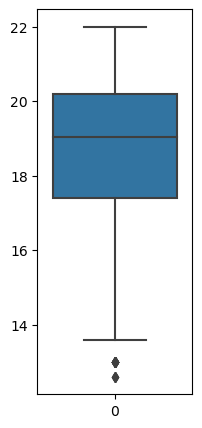

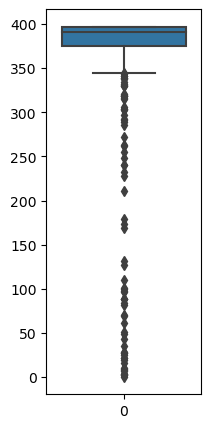

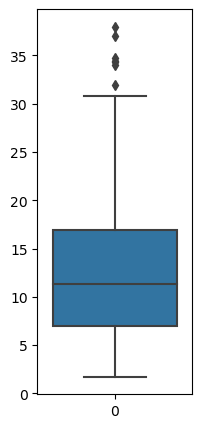

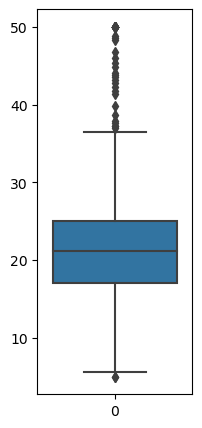

In [41]:
for i in range(len(df.columns)):
    plt.figure(figsize=(2,5))
    sns.boxplot(data=df[df.columns[i]])
    plt.show()

Creamos una copia para limpiar los datos y eliminar outliers

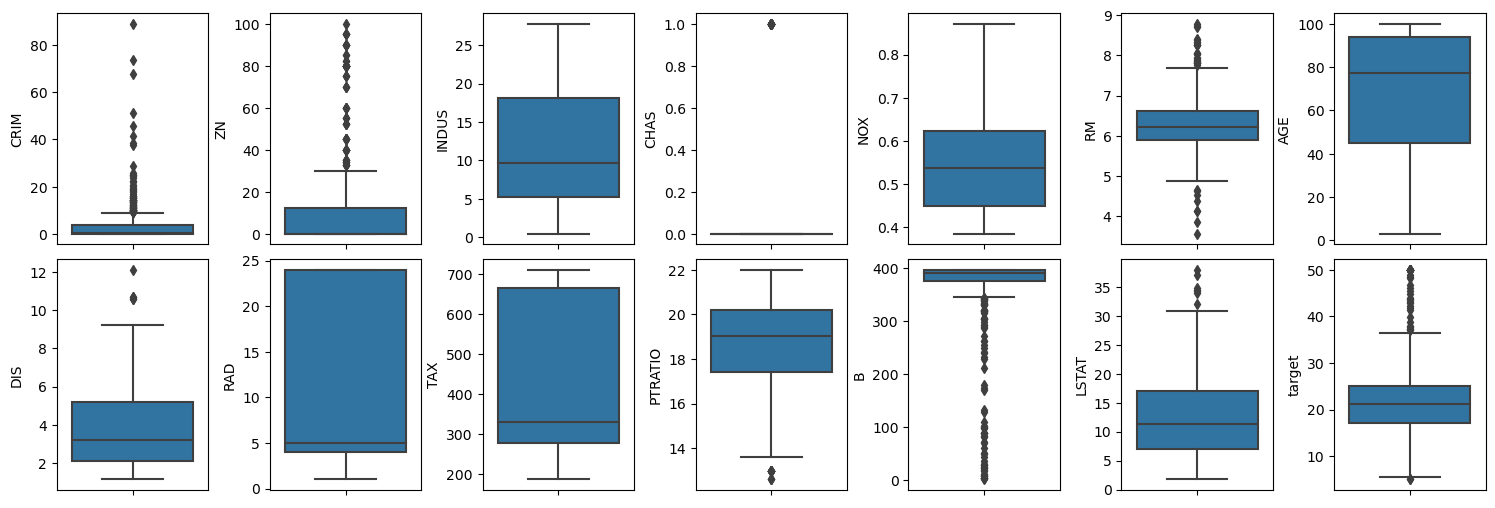

In [42]:
#Objetivo: detectar valores atípicos en las variables

#Configuramos la distribución
fig, ax = plt.subplots(ncols=7,nrows=2, figsize=(15,5))

ax = ax.flatten()

pos=0
for i in df.columns:
    sns.boxplot(y=i, data=df, ax=ax[pos])
    pos+=1

plt.tight_layout(pad=0.4)

plt.show()

In [54]:
filtrar = ['CRIM','INDUS','RM','DIS','B','LSTAT','target']

def borrar_outliers(df,column):
    # cuartiles
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Objetivo --> quedarse con la mitad central de los datos
    # Definir el rango de datos con los que nos vamos a quedar
    # iqr --> rango intercuartil
    IQR = Q3 - Q1
    lim_inferior = Q1 - 1.5 * IQR
    lim_superior = Q3 + 1.5 * IQR

    # Filtramos los datos del rango 
    df_nuevo = df[(df[column] >= lim_inferior) & (df[column] <= lim_superior)]

    #¿Cuántos valores eliminamos?
    eliminados = len(df) - len(df_nuevo)
    print(f"Columna: {column} se han elimninado {eliminados} muestras")

    #Devolvemos el nuevo conjunto de datos
    return df_nuevo

# Eliminamos los valores atípicos de cada columna
for columna in filtrar:
    df = borrar_outliers(df, columna)

print("Tamaño del conjunto (final): ",df.shape)    

Columna: CRIM se han elimninado 66 muestras
Columna: INDUS se han elimninado 0 muestras
Columna: RM se han elimninado 23 muestras
Columna: DIS se han elimninado 5 muestras
Columna: B se han elimninado 50 muestras
Columna: LSTAT se han elimninado 10 muestras
Columna: target se han elimninado 15 muestras
Tamaño del conjunto (final):  (337, 14)
